## 回归模型
![线性回归示意图](./images/监督学习-回归-1.png)
- 回归模型预测数值，线性回归是回归模型的一种

| 特征   | 标签  |
|------|-----|
| 2104 | 400 |
| 1416 | 232 |
| 1534 | 315 |
| ...  | ... |
| 3210 | 870 |

### 机器学习术语
- 训练集（training set): 用来训练模型的数据
- x：特征（feature）/输入变量
- y：输出变量/目标变量
- m：训练集的数量
- (x,y): 单个训练数据
- $x^{(i)}$, $y^{(i)}$： 第i个训练数据

监督学习：

训练集 -- 学习算法 -- 得到一个 f（数学模型， 函数）

x（特征）-- f（模型，函数） -- 预测（预测的y）

问题：这个f怎么表示？

f(x) = wx + b,  这是一个最简单的回归模型：线性回归。 但它可以作为其他回归模型的理解基础
在示例的数据中，它是单变量的线性回归，特征只有一个变量

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x_train 输入变量
# y_train 目标变量
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [4]:
# 使用m 表示训练数据的数量
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
# m = len(x_train)
print(f"训练数据的数量: {m}")

x_train.shape: (2,)
训练数据的数量: 2


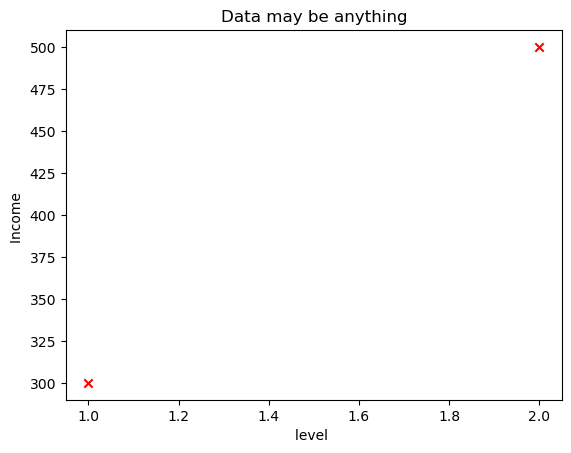

In [6]:
# 画数据的散点图
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Data may be anything")
# Set the y-axis label
plt.ylabel('Income ')
# Set the x-axis label
plt.xlabel('level ')
plt.show()

In [14]:
# 用直线（线性模型）去匹配训练数据，定义线性模型本身的参数 w，b （f(x)=wx+b)
w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 200
b: 100


In [ ]:
# 可以对每个训练数据的输入变量，计算 f 预测的输出
def compute_model_output(x, w, b):
    """
    计算线性模型的预测
    Args:
      x (ndarray (m,)): Data, m 个训练数据的输入变量
      w,b (scalar)    : 模型参数
    Returns
      f_wb (ndarray (m,)): 模型对输入的预测
    """
    return w*x + b


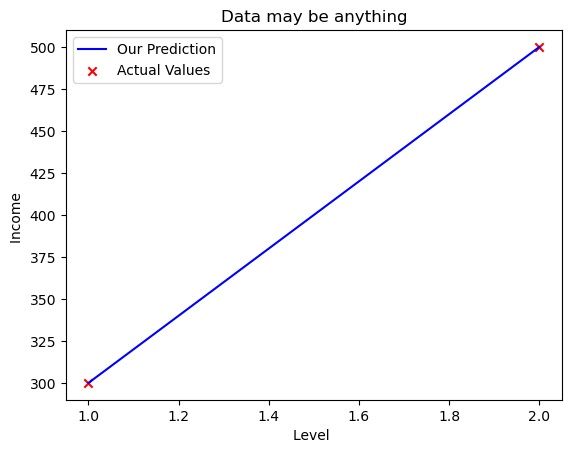

In [15]:
# 调用compute_model_output, 画出输出

tmp_f_wb = compute_model_output(x_train, w, b)
tmp_f_wb
# 画预测的线
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
#
# 画训练数据
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
#
# 设置标题
plt.title("Data may be anything")
#
# 设置y轴标签
plt.ylabel('Income ')
#
# 设置x轴标签
plt.xlabel('Level ')
plt.legend()  # 显示图例
plt.show()

In [ ]:
# 随堂练习：
# 尝试去为线性模型设置不同w和b， w，b是多少的时候可以最好地拟合训练数据


In [16]:
# 预测：现在有了具体的模型（得出了模型的参数，在线性模型里是w和b），可以拿它用来预测没有见过的输入
x_new = 1.2
income_pred = w * x_new + b
print(f"对x=1.2预测的数据: {income_pred:.2f}")

对x=1.2预测的数据: 340.00


### 损失函数
![单个损失](./images/监督学习-回归-2.png)
- 衡量模型的表现，损失函数的值越小说明模型表现越好
- 最小化损失函数的值也被称作训练目标
- f(x) = wx+b, x是固定的，由输入的数据决定，w和b是可以调整的，w，b也被称作模型的权重
- 训练数据的实际的y和f(x)预测的y有差距，因此可以将把每个训练数据的误差都考虑到，定义如下损失函数：均方误差损失（MSE）：
<!-- 预测值定义 -->
$$
\hat y^{(i)} \;=\; w^{\top}x^{(i)} + b
$$

<!-- 损失函数 -->
$$
J(w,b) \;=\; \frac{1}{2m}\sum_{i=1}^{m}\!\bigl(\,\hat y^{(i)} - y^{(i)}\bigr)^2
$$
- 1/2m为了让这个损失值不会因为训练集变大，使误差变得很大；也为了后续计算方便
- 注意：不同的w，b决定了不同的直线模型，不同的直线模型在训练数据上有不同的损失 -> J(w,b)是关于w，b的函数！w，b是自变量。
- 找到w，b使得J(w,b)最小化，这样的w，b也能最贴合训练数据，只要J(w,b)的定义合理

总结： 模型训练的四要素
- 模型的假设： 对模型数学公式的假设，直线模型
- 参数：数学公式自己的参数，wx+b， 参数 w和b
- 损失函数: 关于参数的函数，输入：模型的参数 返回的数字
- 目标： 找到w和b，可以最小化损失函数

![损失函数图像](./images/监督学习-回归-3.png)

### 达到目标/最小化损失函数的方式 -- 梯度下降
- 一个函数关于每个变量的偏导数，每个变量的偏导数组织在一起是一个向量，这个向量的方向是函数增长最快的方向
- 每个具体w，b计算梯度,得到具体的向量，当前w，b沿着梯度相反的方向走，可以是J(w,b)变小
- 梯度下降算法在机器学习中很常用，不只是线性回归
- 步骤：
-   1. 初始化w和b  2. 不断改变w，b使得J(w,b)变小  3. 直到在最小值附近
- 损失函数不一定只有一个最小值，可能有多个最小值, 所以不同的初始w，b可能会走向不同的最小值；但平方差之和的损失函数肯定只有一个最小值：

![多个最小值的损失函数](./images/监督学习-回归4.png)

### 梯度下降：同步更新 vs. 不同步更新

| 步骤           | **同步更新（Simultaneous / Synchronous）**<br>——最常用，保证同一轮梯度基于“旧参数” | **不同步更新（Sequential / Asynchronous）**<br>——概念说明用，实际较少单独使用                                                             |
|--------------|------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| **1 计算梯度**   | \\(g_w = \frac{\partial J}{\partial w}(w,b),\; g_b = \frac{\partial J}{\partial b}(w,b)\\) | **先算 \\(w\\) 梯度**<br>\\(g_w = \frac{\partial J}{\partial w}(w,b)\\)                                                  |
| **2 生成暂存变量** | \\(\tilde w = w - \alpha g_w\\)<br>\\(\tilde b = b - \alpha g_b\\) | （无暂存，直接改）<br>\\(w \leftarrow w - \alpha g_w\\)                                                                       |
| **3 赋值**     | \\(w \leftarrow \tilde w\\)<br>\\(b \leftarrow \tilde b\\)<br>**同时生效** | **再用已更新的 \\(w\\)** 重新计算<br>\\(g_b = \frac{\partial J}{\partial b}(w,b)\\)<br>然后<br>\\(b \leftarrow b - \alpha g_b\\) |
| **4 迭代下一轮**  | 全部参数都基于**上一轮旧值**算梯度，收敛更平稳 | 后计算的参数用到了**前面已更新的新值**；和同步更新的性质不一样                                                                                    |

---

- 同步更新公式（常用写法）：
\begin{aligned}
g_w &= \frac{1}{m}\sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)})\,x^{(i)},\\[4pt]
g_b &= \frac{1}{m}\sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)}),\\[8pt]
w &\leftarrow w - \alpha\,g_w,\\
b &\leftarrow b - \alpha\,g_b.
\end{aligned}

- 不同步更新示例：
\begin{aligned}
w &\leftarrow w - \alpha\,\frac{\partial J}{\partial w}(w,b)\\[6pt]
b &\leftarrow b - \alpha\,\frac{\partial J}{\partial b}\bigl(\underbrace{w}_{\text{已更新}},\,b\bigr).
\end{aligned}

- 梯度下降直觉：
1. 可以把参数b去掉，J(w)是一个变量的函数，J(w)在某个w0的导数是正数，说明w0应该往左，J(w)会变低；导数是负数，说明w0应该往右，J(w)会变低，所以即使单个变量的函数，把导数的正负看成方向，导数的方向也是函数增长的最快方向。
2. 所以参数的更新公式是 w = w - learning_rate(学习率) * (dJ/dw), dJ/dw是损失函数的导数； 才可能保证J(w)变低

### 学习率α
- 如果学习率太小，梯度下降可以正常进行，但会很慢

![学习率小](./images/监督学习-回归5.png)

- 如果学习率太大：
    1. 更新可能会一直跨过达到最小值的参数，一直到不了最小值
    2. 损失函数值可能不会收敛到一个值，会发散。

![学习率大](./images/监督学习-回归6.png)

- 如果初始化的参数正好落在了局部最小值，梯度下降不会更新参数
- 如果学习率正合适，每次用梯度下降更新参数，不需要改变学习率，固定学习率也可以使得J(w,b)到达局部最小值
    1. 在局部最小值附近，导数变小了，每次更新的幅度自动变小了
    2. 所以不需要降低学习率去到达局部最小

![学习率合适](./images/监督学习-回归7.png)

### 线性回归模型的梯度下降
- 线性回归模型：
$$
f(x) \;=\; w*x + b
$$
- 损失函数：
$$
J(w,b) \;=\; \frac{1}{2m}\sum_{i=1}^{m}\!\bigl(\,f(x^{(i)}) - y^{(i)}\bigr)^2
$$
- 优化（最小化）损失函数的方式：
\begin{aligned}
g_w &= \frac{1}{m}\sum_{i=1}^{m}(f(x^{(i)})-y^{(i)})\,x^{(i)},\\[4pt]
g_b &= \frac{1}{m}\sum_{i=1}^{m}(f(x^{(i)})-y^{(i)}),\\[8pt]
w &\leftarrow w - \alpha\,g_w,\\
b &\leftarrow b - \alpha\,g_b.
\end{aligned}

- 导数公式的推导过程（不理解也没关系，有最终的梯度公式就能写代码了）：
\begin{aligned}
\frac{\partial J}{\partial w}
   &=\frac{\partial}{\partial w}\;
     \frac1{2m}\sum_{i=1}^{m}\Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr)^2 \\[4pt]
   &=\frac1{2m}\sum_{i=1}^{m}2\bigl(wx^{(i)}+b-y^{(i)}\bigr)\,x^{(i)} \\[4pt]
   &=\frac1{m}\sum_{i=1}^{m}\Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr)\,x^{(i)}
\end{aligned}

\begin{aligned}
\frac{\partial J}{\partial b}
   &=\frac{\partial}{\partial b}\;
     \frac1{2m}\sum_{i=1}^{m}\Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr)^2 \\[4pt]
   &=\frac1{2m}\sum_{i=1}^{m}2\bigl(wx^{(i)}+b-y^{(i)}\bigr) \\[4pt]
   &=\frac1{m}\sum_{i=1}^{m}\Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr)
\end{aligned}

- 梯度下降最终算法：
重复执行以下逻辑，直到J的值收敛了，或者直到w和b的梯度接近于0；注意：**同时更新 \(w\) 和 \(b\)**
\begin{aligned}
w &\;\leftarrow\; w - \alpha \,\frac{1}{m}\sum_{i=1}^{m}
      \Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr)\,x^{(i)},\\[6pt]
b &\;\leftarrow\; b - \alpha \,\frac{1}{m}\sum_{i=1}^{m}
      \Bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\Bigr).
\end{aligned}

- 线性回归的平方差之和的损失函数是凹函数（碗状函数），只有一个全局最小值，没有局部最小值
- 这个算法梯度下降的每一步用了所有的训练数据，每一步用了所有训练数据的梯度下降也叫 批量梯度下降（Batch Gradient Descent)； 有一步梯度下降用训练数据的子集参与计算的算法


### 线性回归梯度下降代码实验

In [1]:
import numpy as np
import matplotlib.pyplot as plt

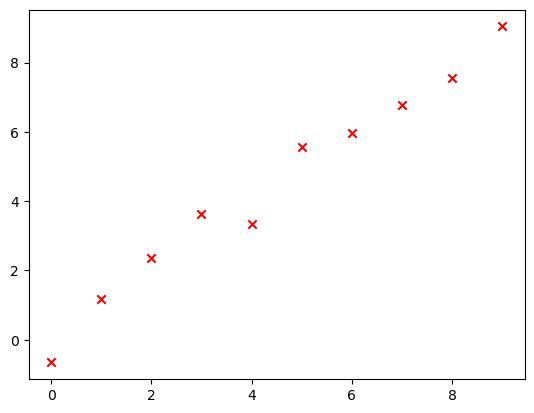

In [6]:
# TODO 1. 自定义训练集数据, 并用散点图可视化
x_train = ...  # 输入数据
y_train = ...  # 输入数据对应的标签

# 示例图片：

In [27]:
# 2. 完成损失函数的实现
def compute_cost(x, y, w, b):
    """
    x: ndarray (m,) 训练数据的特征
    y: ndarray (m,) 训练数据的标签
    w: 浮点数，直线模型的参数
    b: 浮点数，直线模型的参数
    return: 浮点数，当前w，b下的损失值
    """
    # TODO

In [28]:
# 3. 完成计算梯度函数的实现
def compute_gradient(x, y, w, b):
    """
    计算线性回归的梯度
    参数:
      x (ndarray (m,)): 输入数据，m 个样本
      y (ndarray (m,)): 目标值
      w, b (浮点数)   : 模型参数
    返回:
      dj_dw (浮点数): 损失函数对参数 w 的梯度
      dj_db (浮点数): 损失函数对参数 b 的梯度
    """
    # TODO

- 检查梯度计算实现是否正确，本质是根据导数的定义来计算：
| 概念                          | 说明                                                                                                                                                                             |
| --------------------------- |--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **梯度检查（Gradient Checking）** | 在机器学习中会遇到复杂的梯度公式。为了防止推导或代码实现出错，可用 **数值差分**（finite difference）近似梯度，再与解析梯度对比。若两者误差极小，就说明实现是可信的。                                                                                  |
| **中心差分**                    | 数值梯度近似公式：<br>\\(\displaystyle \frac{\partial J}{\partial \theta}\approx\frac{J(\theta+\varepsilon)-J(\theta-\varepsilon)}{2\varepsilon}\\)；误差 \\(O(\varepsilon^2)\\)，比单边差分更精确。 |
| **适用场景**                    | - 调试早期代码<br>- 单元测试（确保未来改动不破坏梯度）<br>                                                                                                                        |
| **限制**                      | 数值差分需要多次计算损失函数，**速度慢**。真实深度神经网络只在开发阶段做小批量检查。                                                                                                                  |


- 中心差分更准确的数学扩展（了解即可）：

为什么中心差分更精确？

\begin{aligned}
J(\theta + \varepsilon)
&= J(\theta) + \varepsilon J'(\theta) + \frac{\varepsilon^{2}}{2}J''(\theta) + \mathcal{O}\!\bigl(\varepsilon^{3}\bigr),\\[6pt]
J(\theta - \varepsilon)
&= J(\theta) - \varepsilon J'(\theta) + \frac{\varepsilon^{2}}{2}J''(\theta) + \mathcal{O}\!\bigl(\varepsilon^{3}\bigr).
\end{aligned}

上述公式相减，误差只剩下极小数epsilon的立方项



In [29]:
def gradient_check(x, y, w, b, eps=1e-7, tol=1e-4, verbose=True):
    """
    使用数值差分验证 compute_gradient 是否正确
    Args:
        x, y : 数据集
        w, b : 当前参数（float）
        eps  : 微小扰动 ε，用于近似数值梯度
        tol  : 容差阈值，|解析梯度 - 数值梯度| < tol 视为通过
        verbose: 打印详细差异
    Returns:
        passed (bool) : 是否通过梯度检查
    """
    # 1) 解析梯度
    dj_dw, dj_db = compute_gradient(x, y, w, b)

    # 2) 数值梯度——中心差分
    num_dj_dw = (compute_cost(x, y, w + eps, b) -
                 compute_cost(x, y, w - eps, b)) / (2 * eps)
    num_dj_db = (compute_cost(x, y, w, b + eps) -
                 compute_cost(x, y, w, b - eps)) / (2 * eps)

    # 3) 误差
    diff_w = abs(dj_dw - num_dj_dw)
    diff_b = abs(dj_db - num_dj_db)
    passed = diff_w < tol and diff_b < tol

    if verbose:
        print(f"你实现的 dj_dw = {dj_dw: .6e}, 数值模拟 = {num_dj_dw: .6e}, 误差 = {diff_w: .2e}")
        print(f"你实现的 dj_db = {dj_db: .6e}, 数值模拟 = {num_dj_db: .6e}, 误差 = {diff_b: .2e}")
        print("OK! Gradient check PASSED" if passed else "Gradient check FAILED")

    return passed

test_w = 2
test_b = 1
assert gradient_check(x_train,y_train,test_w,test_b), "梯度检查失败 梯度的实现有问题！！！"

你实现的 dj_dw =  3.319238e+01, 数值模拟 =  3.319238e+01, 误差 =  1.74e-08
你实现的 dj_db =  5.525835e+00, 数值模拟 =  5.525835e+00, 误差 =  8.63e-09
OK! Gradient check PASSED


- 实现梯度下降算法

既然梯度可以计算了，梯度下降法就可以实现了。要实现什么（Todo） 以及其他代码在做什么在注释中描述。 实现完成后，你将利用此函数在训练数据上找到 w和 b的最优值。


In [30]:
import math
def gradient_descent(x, y, w_in, b_in, alpha, num_iters,
                     cost_function, gradient_function):
    """
    执行梯度下降以拟合线性模型参数 w、b
    将进行 num_iters 次参数更新，学习率为 alpha。

    参数:
      x (ndarray (m,))  : 输入数据，共 m 个样本
      y (ndarray (m,))  : 目标值
      w_in, b_in (float): 参数初始值
      alpha (float)     : 学习率
      num_iters (int)   : 梯度下降迭代次数
      cost_function     : 计算成本 J 的函数
      gradient_function : 计算梯度 (dj_dw, dj_db) 的函数

    返回:
      w (float)        : 迭代结束后的 w
      b (float)        : 迭代结束后的 b
      J_history (list) : 每次迭代的损失值
      p_history (list) : 每次迭代的参数 [w, b]
    """

    # 用于保存损失值和参数历史，便于后续绘图
    J_history = []
    p_history = []

    w, b = w_in, b_in
    dj_dw, dj_db = 0, 0

    for i in range(num_iters):
        # Todo：1. 利用形式参数 gradient_function 计算梯度

        # Todo：2.  按梯度下降公式同步更新参数 w，b

        # 保存成本与参数
        if i < 100_000:            # 防止存储资源消耗过大
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        # 每进行总迭代次数的 1/10（或不足 10 次时每次）打印一次训练的信息
        if i % math.ceil(num_iters / 10) == 0:
            print(f"迭代 {i:4d}:  成本 {J_history[-1]:0.2e}  "
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  "
                  f"w: {w: 0.3e}, b: {b: 0.5e}")

    # 返回最终参数及历史记录
    return w, b, J_history, p_history

In [31]:
# 初始化直线的参数
w_init = 0
b_init = 0

# 梯度下降算法 设置迭代次数 和 学习率
iterations = 10000
tmp_alpha = 1.0e-2

# 运行梯度下降
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"梯度下降找到的(w,b) : ({w_final:8.4f},{b_final:8.4f})")

迭代    0:  成本 7.14e+00  dj_dw: -2.831e+01, dj_db: -4.474e+00  w:  2.831e-01, b:  4.47416e-02
迭代 1000:  成本 9.72e-02  dj_dw: -3.697e-04, dj_db:  2.318e-03  w:  9.895e-01, b:  2.38730e-02
迭代 2000:  成本 9.72e-02  dj_dw: -2.187e-05, dj_db:  1.371e-04  w:  9.907e-01, b:  1.61708e-02
迭代 3000:  成本 9.72e-02  dj_dw: -1.294e-06, dj_db:  8.111e-06  w:  9.908e-01, b:  1.57152e-02
迭代 4000:  成本 9.72e-02  dj_dw: -7.652e-08, dj_db:  4.798e-07  w:  9.908e-01, b:  1.56882e-02
迭代 5000:  成本 9.72e-02  dj_dw: -4.526e-09, dj_db:  2.838e-08  w:  9.908e-01, b:  1.56866e-02
迭代 6000:  成本 9.72e-02  dj_dw: -2.677e-10, dj_db:  1.679e-09  w:  9.908e-01, b:  1.56865e-02
迭代 7000:  成本 9.72e-02  dj_dw: -1.584e-11, dj_db:  9.931e-11  w:  9.908e-01, b:  1.56865e-02
迭代 8000:  成本 9.72e-02  dj_dw: -9.354e-13, dj_db:  5.875e-12  w:  9.908e-01, b:  1.56865e-02
迭代 9000:  成本 9.72e-02  dj_dw: -5.809e-14, dj_db:  3.472e-13  w:  9.908e-01, b:  1.56865e-02
梯度下降找到的(w,b) : (  0.9908,  0.0157)


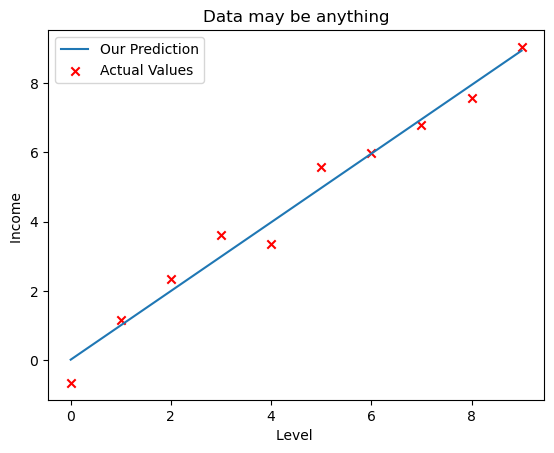

In [33]:
# TODO： 画 对训练数据拟合的直线 和 训练数据的散点图，画到一张图里

# 示例图片：

- 损失值和梯度下降迭代次数的关系

损失值与迭代次数的关系图是衡量梯度下降进展的有效指标。在成功的运行中，成本应该始终下降。由于初始成本的变化非常迅速，因此将初始下降过程与最终下降过程以不同的比例绘制是很有用的。在下图中，请注意坐标轴上的损失比例和迭代步长。

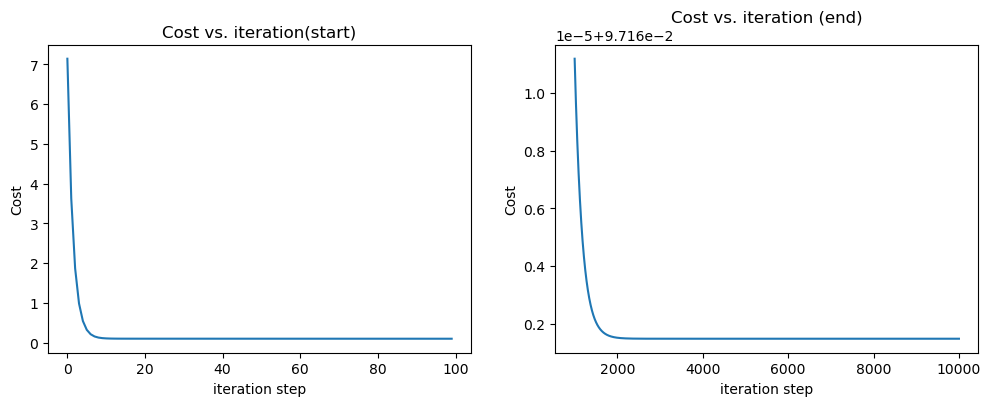

In [35]:
# 画损失值 和 迭代次数的关系
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

- 预测

现在您已经找到了参数 w 和 b的最优值，现在可以使用模型根据我们学习到的参数来预测没有见过的数据。

In [37]:
# TODO： 自己任意定义不在训练集里的x，用学习到的参数w和b预测x对应的y

- 增加学习率alpha

我们讨论了梯度下降中学习率 alpha 的合理取值。𝛼 越大，梯度下降收敛速度越快。但是，如果 𝛼 过大，梯度下降就会发散。上面有一个收敛效果良好的解的例子。
我们试着增加 𝛼 的值，看看会发生什么：

In [38]:
# 初始化参数
w_init = 0
b_init = 0

# 设置学习率
iterations = 10
tmp_alpha = ... # TODO： 设置一个相对较大的alpha （0.8-2之间）

# 运行梯度下降
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

迭代    0:  成本 7.04e+03  dj_dw: -2.831e+01, dj_db: -4.474e+00  w:  2.265e+01, b:  3.57933e+00
迭代    1:  成本 3.52e+06  dj_dw:  6.332e+02, dj_db:  1.010e+02  w: -4.839e+02, b: -7.72307e+01
迭代    2:  成本 1.76e+09  dj_dw: -1.417e+04, dj_db: -2.259e+03  w:  1.085e+04, b:  1.73026e+03
迭代    3:  成本 8.83e+11  dj_dw:  3.170e+05, dj_db:  5.055e+04  w: -2.427e+05, b: -3.87112e+04
迭代    4:  成本 4.42e+14  dj_dw: -7.092e+06, dj_db: -1.131e+06  w:  5.431e+06, b:  8.66130e+05
迭代    5:  成本 2.21e+17  dj_dw:  1.587e+08, dj_db:  2.531e+07  w: -1.215e+08, b: -1.93789e+07
迭代    6:  成本 1.11e+20  dj_dw: -3.550e+09, dj_db: -5.662e+08  w:  2.719e+09, b:  4.33585e+08
迭代    7:  成本 5.54e+22  dj_dw:  7.944e+10, dj_db:  1.267e+10  w: -6.083e+10, b: -9.70108e+09
迭代    8:  成本 2.78e+25  dj_dw: -1.777e+12, dj_db: -2.834e+11  w:  1.361e+12, b:  2.17053e+11
迭代    9:  成本 1.39e+28  dj_dw:  3.977e+13, dj_db:  6.342e+12  w: -3.045e+13, b: -4.85637e+12


### 多个输入值（特征）和一个标签的回归

| 训练样本 $i$ | $x_1$<br/>房屋面积 (ft²) | $x_2$<br/>卧室数 | $x_3$<br/>楼层数 | $x_4$<br/>房龄 (年) | $y$<br/>价格 (× \$1 000) |
| -------- | -------------------- | ------------- | ------------- | ---------------- | ---------------------- |
| 1        | 2104                 | 5             | 1             | 45               | 460                    |
| 2        | **1416**             | **3**         | **2**         | **40**           | 232                    |
| 3        | 1534                 | 3             | 2             | 30               | 315                    |
| 4        | 852                  | 2             | 1             | 36               | 178                    |
| …        | …                    | …             | …             | …                | …                      |

> **例子（i = 2）：**
> $\vec{x}^{(2)} = [\,1416,\;3,\;2,\;40\,]$
> $x^{(2)}_3 = 2$

---

1. 记号说明

| 记号              | 含义                         |
| --------------- | -------------------------- |
| $x_j$           | 第 $j$ 个特征（列）               |
| $n$             | 特征数量，本例 $n = 4$（$j = 1…4$） |
| $\vec{x}^{(i)}$ | 第 $i$ 个训练样本的**特征向量**       |
| $x^{(i)}_j$     | 第 $i$ 个样本在第 $j$ 个特征上的取值    |
| $y^{(i)}$       | 第 $i$ 个样本的目标值（房价）          |

---

* 对于样本 $i = 2$：

  * 特征向量 $\vec{x}^{(2)} = [1416,\;3,\;2,\;40]$
  * “楼层数”对应的取值 $x^{(2)}_3 = 2$

2. 多特征线性回归模型

在单变量回归中，我们只有一个特征 $x$。
对 **多特征（多变量）** 情况，假设函数拓展为：

$$
h_\theta(\vec{x}) \;=\; \theta_0 \;+\; \theta_1 x_1 \;+\; \theta_2 x_2 \;+\; \theta_3 x_3 \;+\; \theta_4 x_4
$$
直觉理解：
1. 每一个特征都将影响标签y，参数是负的，说明随着这个特征和标签y是负相关；参数是正的，说明这个特征和标签y是正相关，参数绝对值接近0说明这个特征和标签关系不大
2. 当所有特征都是0时，也有个基础标签值

* 令 $x_0 = 1$（偏置项），可写成向量形式

  $$
  h_\theta(\vec{x}) \;=\; \theta^\top \vec{x}
  $$
  $$
\begin{aligned}
\theta^\top \vec{x}
&= [\,\theta_0,\;\theta_1,\;\theta_2,\;\dots,\;\theta_n\,]
   \begin{bmatrix}
     1 \\ x_1 \\ x_2 \\ \vdots \\ x_n
   \end{bmatrix} \\[4pt]
&= \theta_0\cdot 1 \;+\; \theta_1x_1 \;+\; \theta_2x_2 \;+\; \dots \;+\; \theta_nx_n
\end{aligned}
$$
向量点乘是更紧凑的写法，与逐项相加完全等价

* **第一项** $\theta_0\cdot 1$ 就是偏置（intercept）。
* 剩余各项 $\theta_jx_j$（$j=1…n$）对应每个特征的“权重×取值”。
* $\theta = [\,\theta_0,\theta_1,\dots,\theta_n]^\top$ 为模型参数。
---

快速问答，$x^{(4)}_1$指的在示例的数据里，指的指是多少？

#### 向量化
好处：
1. 代码简洁
2. 能利用线性代数计算的库（numpy）的底层代码（C语言），CPU并行计算，甚至GPU参与运算  -> 代码运行更快

- 参数与特征

* **权重向量** $\mathbf{w} = [\,w_1,\;w_2,\;w_3\,]$ （此处 $n = 3$）
* **偏置（截距）** $b$ — 单个数字
* **特征向量** $\mathbf{x} = [\,x_1,\;x_2,\;x_3\,]$

> **索引小提示**
>
> * **线性代数**：下标从 1 开始（$w_1,w_2,\dots$）
> * **NumPy / Python**：下标从 0 开始（`w[0]`, `w[1]`, `w[2]`）

```python
# NumPy 表示
w = np.array([1.0,  2.5, -3.3])
b = 4
x = np.array([10, 20, 30])
```

---

- 未向量化的实现

数学公式

$$
f_{\mathbf{w},b}(\mathbf{x}) \;=\; \sum_{j=1}^{n} w_j\,x_j \;+\; b
$$

Python 循环写法（代码冗长且较慢）

```python
f = 0
for j in range(n):      # j = 0 … n‑1
    f += w[j] * x[j]
f += b
```

> 当 $n = 100{,}000$ 时，这种写法会十分低效。

---

- 向量化的实现

数学公式

$$
f_{\mathbf{w},b}(\mathbf{x}) \;=\; \mathbf{w}\,\cdot\,\mathbf{x} \;+\; b
$$

NumPy 一行代码（简洁且高效）

```python
f = np.dot(w, x) + b
```

> 通过一次向量点乘即可完成所有乘加运算，强烈建议始终使用向量化写法。

实现也可以往x内添个1， 然后偏置b也放到权重向量里面
| 步骤                 | 说明                                                                                      |
| ------------------ | --------------------------------------------------------------------------------------- |
| 1 在特征向量最前面加上常数 1 | 得到 **增广特征向量** <br> $\tilde{\mathbf{x}} = [\,1,\;x_1,\;x_2,\;x_3\,]$                     |
| 2 把偏置并入权重向量      | 得到 **增广权重向量** <br> $\tilde{\mathbf{w}} = [\,b,\;w_1,\;w_2,\;w_3\,]^\top$                |
| 3 预测公式           | $\displaystyle \hat{y} = \tilde{\mathbf{w}} \,\cdot\, \tilde{\mathbf{x}}$ —— 无需再写 `+ b` |

---

- 循环 VS. 向量化 — 为什么 `np.dot` 更快的底层原因

1. 逐项循环在做什么？

* **时间片 $t_0$**：先算 `w[0] * x[0]` 并累加到 `f`
* **时间片 $t_1$**：再算 `w[1] * x[1]` 并累加……
* ……
* **时间片 $t_{15}$**：最后算 `w[15] * x[15]` 并累加
* **缺点**：一次只做一个乘法 + 加法，16 维向量就要跑 16 次循环，对更高维数据或上百万样本更是灾难。


2. 向量化背后发生了什么？

1. **并行乘法**

   * NumPy/底层 BLAS 库会把整段内存中的 16 个 `w[j]` 与 `x[j]` **同时** 送进 CPU 的向量化指令（SIMD）或多核线程。
2. **流水线累加**

   * 乘完后的 16 个结果再通过高效的归约（reduction）操作一次性求和。
3. **结果回写**

   * 整个过程几乎没有 Python 层面的循环开销，而且充分利用了 CPU 缓存和并行度。

> **一句话总结**：
> 把 *“多次循环 + 小标量运算”* 换成 *“一次大规模矩阵/向量运算”*，让底层数值库接管并行化与内存优化，**才能真正扩展到大数据集**。




![循环和向量化对比](./images/监督学习-回归8.png)

- 注意：梯度下降也要向量化
$\mathbf{w} = [\,b,\;w_1,\;w_2,\;w_3, ... w_{16}\,]$
$\mathbf{d} = [\,d_b,\;d_1,\;d_2,\;d_3\, ... d_{16}]$

w和d都是numpy数组后，直接w - 0.1*d即可


- 快速问答：
- 下面的代码在实现，计算线性回归模型的预测值，哪一个实现是向量化的？
1. f = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + b
2. ```python
   f = 0
   for j in range(n):
       f = f + w[j] * x[j]
   f = f + b
   ```
3. f = np.dot(w,x) + b

### 多特征线性回归实验
- 这次实验是之前线性回归实验的扩展，扩展到支持多个输入特征
- 使用矩阵表示训练数据的输入特征
- 重写了预测，损失函数以及计算梯度去支持多个特征
- 使用了向量化的技巧

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)   # 减少数组里 浮点数显示出来的精度

下面给出一份更完整、格式一致的 **多特征线性回归记号速查表**，补全了所有 Python 示例变量，并在括号中给出了常见的形状（行 × 列）说明，方便对照代码实现。

| 记号                                   | 含义                                                                                                                         | Python 变量名 (示例)                    | 典型形状             |
|:-------------------------------------| :------------------------------------------------------------------------------------------------------------------------- | :--------------------------------- | :--------------- |
| **通用线性代数记号**                         |                                                                                                                            |                                    |                  |
| $a$                                  | 标量（非粗体）                                                                                                                    | `a`                                | $()$             |
| $\mathbf{a}$                         | 向量（粗体小写）                                                                                                                   | `a_vec`                            | $(n,)$ 或 $(n,1)$ |
| $\mathbf{A}$                         | 矩阵（粗体大写）                                                                                                                   | `A_mat`                            | $(m,n)$          |
| **回归数据**                             |                                                                                                                            |                                    |                  |
| $\mathbf{X}$                         | 训练样本特征矩阵                                                                                                                   | `X_train`                          | $(m,n)$          |
| $\mathbf{y}$                         | 训练样本目标向量                                                                                                                   | `y_train`                          | $(m,)$ 或 $(m,1)$ |
| $\mathbf{x}^{(i)}$                   | 第 $i$ 条样本的特征向量                                                                                                             | `X_train[i]`                       | $(n,)$           |
| $y^{(i)}$                            | 第 $i$ 条样本的目标值                                                                                                              | `y_train[i]`                       | $()$             |
| $m$                                  | 样本数量                                                                                                                       | `m = X_train.shape[0]`             | —                |
| $n$                                  | 每条样本的特征数                                                                                                                   | `n = X_train.shape[1]`             | —                |
| **模型参数**                             |                                                                                                                            |                                    |                  |
| $\mathbf{w}$                         | 权重向量                                                                                                                       | `w`                                | $(n,)$           |
| $b$                                  | 偏置（截距）                                                                                                                     | `b`                                | $()$             |
| **模型与预测**                            |                                                                                                                            |                                    |                  |
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | 在样本 $\mathbf{x}^{(i)}$ 上的模型输出：<br>$\displaystyle f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w}\cdot\mathbf{x}^{(i)} + b$ | `f_wb = np.dot(w, X_train[i]) + b` | $()$             |

> **提示**
>
> * 在 NumPy 中，你可以用 `X @ w + b` 一次性计算 **全部** 样本的预测，其中 `X` 形状为 $(m,n)$，`w` 为 $(n,)$。
> * 若采用 **增广向量技巧**（在 `X` 前拼接一列 1，并把 `b` 并入权重向量），则预测可写成 `X_tilde @ w_tilde`，再也不用显式写 `+ b`。


- 问题背景
> 使用 **房价预测** 作为示例。训练数据集现在包含 **7 个样本、4 个特征**（面积、卧室数、楼层数、房龄），数据见下表。
> 训练好线性回归模型后，就能预测其他房屋的价格，例如「面积 1200 sqft、3 间卧室、1 层、房龄 40 年」的房屋。



- 训练数据集

|  样本 | 面积 (sqft) | 卧室数 | 楼层数 | 房龄 (年) | 价格 (千美元) |
| :-: |:---------:|:---:|:---:|:------:|:--------:|
|  1  |   2104    |  5  |  1  |   45   |   460    |
|  2  |   1416    |  3  |  2  |   40   |   232    |
|  3  |    852    |  2  |  1  |   35   |   178    |
|  4  |   1260    |  3  |  1  |   20   |   240    |
|  5  |   3000    |  4  |  2  |   5    |   540    |
|  6  |   1980    |  4  |  1  |   15   |   350    |
|  7  |    890    |  2  |  1  |   60   |   155    |


In [2]:
## 构造 `X_train` 和 `y_train`
import numpy as np

# 特征矩阵：每行一个样本，每列一个特征
X_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [ 852, 2, 1, 35],
    [1260, 3, 1, 20],
    [3000, 4, 2,  5],
    [1980, 4, 1, 15],
    [ 890, 2, 1, 60]
], dtype=float)

# 目标向量：对应的房价，单位千美元
y_train = np.array([460, 232, 178, 240, 540, 350, 155], dtype=float)

m, n = X_train.shape
print(f"样本数 m = {m},  特征数 n = {n}")

样本数 m = 7,  特征数 n = 4


所有训练样本会存放在 NumPy 的矩阵 `X_train` 中。矩阵的 **每一行代表一条训练样本**。当你拥有 $m$ 条训练样本（在本例中 $m = 7$），且每条样本包含 $n$ 个特征（本例中 $n = 4$）时，$\mathbf{X}$ 将是一个维度为 $(m,\,n)$ 的矩阵——也就是 **$m$ 行、$n$ 列**：

$$
\mathbf{X} =
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \vdots & \vdots & \ddots & \vdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1}
\end{pmatrix}
$$


- 记号说明

* **$\mathbf{x}^{(i)}$**
  第 $i$ 条训练样本对应的**特征向量**：

  $$
    \mathbf{x}^{(i)}
    = \bigl(x^{(i)}_0,\;x^{(i)}_1,\;\dots,\;x^{(i)}_{\,n-1}\bigr)
  $$

* **$x^{(i)}_j$**
  第 $i$ 条样本中，第 $j$ 个特征的取值。

  * 括号中的上标 $(i)$ 表示**样本编号**
  * 下标 $j$ 表示**该样本中的第 $j$ 个元素**


- 参数向量 $\mathbf{w}$ 与偏置 $b$

* $\mathbf{w}$ 是一个包含 $n$ 个元素的向量

  * 每个元素对应于一个特征的模型参数
  * 在本数据集中，$n = 4$
  * 通常将其写成列向量：

$$
\mathbf{w} = \begin{pmatrix}
w_0 \\
w_1 \\
\vdots \\
w_{n-1}
\end{pmatrix}
$$

* $b$ 是一个标量（单一数字）参数，用作偏置项。


In [5]:
# 假设b_init 和 w_init 就是训练好的参数
b_init =785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init 类型: {type(b_init)}")

w_init shape: (4,), b_init 类型: <class 'float'>


多变量线性回归模型的预测公式为

$$
f_{\mathbf{w},b}(\mathbf{x})
= w_0 x_0 + w_1 x_1 + \dots + w_{n-1} x_{\,n-1} + b
\tag{1}
$$

也可以写成向量形式

$$
f_{\mathbf{w},b}(\mathbf{x})
= \mathbf{w} \cdot \mathbf{x} + b
\tag{2}
$$

其中 “$\cdot$” 表示**向量点积**。

In [6]:
def predict(x, w, b):
    """
    线性回归的单样本预测函数

    参数
    ----
    x : ndarray, 形状 (n,)
        输入样本，包含 n 个特征
    w : ndarray, 形状 (n,)
        模型权重参数
    b : 标量
        模型偏置参数

    返回
    ----
    p : 标量
        预测结果
    """
    p = np.dot(x, w) + b
    return p

In [7]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec 值: {x_vec}")

f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, 预测: {f_wb}")



x_vec shape (4,), x_vec 值: [2.1e+03 5.0e+00 1.0e+00 4.5e+01]
f_wb shape (), 预测: 459.99999761940825


- 多变量线性回归的代价函数

多特征情况下的代价函数 $J(\mathbf{w},b)$ 定义为

$$
J(\mathbf{w},b)=\frac{1}{2m}\sum_{i=0}^{m-1}
\Bigl(f_{\mathbf{w},b}\bigl(\mathbf{x}^{(i)}\bigr)-y^{(i)}\Bigr)^{2}
\tag{3}
$$

其中

$$
f_{\mathbf{w},b}\bigl(\mathbf{x}^{(i)}\bigr)=
\mathbf{w}\,\cdot\,\mathbf{x}^{(i)}+b
\tag{4}
$$


与之前的实验不同，这里 $\mathbf{w}$ 和 $\mathbf{x}^{(i)}$ 都是 **向量**（而非单个标量），以支持包含多个特征的输入。


In [12]:
def compute_cost(X, y, w, b):
    """
    计算损失
    Args:
      X (ndarray (m,n)): 训练集的输入, m 样本 with n 特征
      y (ndarray (m,)) : 训练集目标
      w (ndarray (n,)) : 模型参数 w
      b (scalar)       : 模型参数 b

    Returns:
      cost (scalar): 损失值
    """
    m = X.shape[0]
    cost = 0.0

    # TODO： 根据公式实现损失函数
    return cost

w_test = np.ones((4,))
b_test = 10
cost_answer = 1117012.2142857143
assert np.isclose(compute_cost(X_train,y_train,w_test,b_test), cost_answer), "compute cost实现有问题"

- 多变量的梯度下降法

梯度下降更新规则：

$$
\begin{align*}
\text{重复执行，直到收敛：}\;\bigl\{ \\
& w_j \;=\; w_j \;-\; \alpha \;\frac{\partial J(\mathbf{w},b)}{\partial w_j}
\qquad\text{对 } j = 0 \dots n-1 \tag{5}\\[4pt]
& b \;=\; b \;-\; \alpha \;\frac{\partial J(\mathbf{w},b)}{\partial b} \\
\bigr\}
\end{align*}
$$

其中 $n$ 为特征数量，参数 $w_j$ 与 $b$ **同时** 更新。各偏导数为

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}
&=\frac{1}{m}\sum_{i=0}^{m-1}
\bigl(f_{\mathbf{w},b}(\mathbf{x}^{(i)})-y^{(i)}\bigr)\,
x_{j}^{(i)} \tag{6}\\[6pt]
\frac{\partial J(\mathbf{w},b)}{\partial b}
&=\frac{1}{m}\sum_{i=0}^{m-1}
\bigl(f_{\mathbf{w},b}(\mathbf{x}^{(i)})-y^{(i)}\bigr) \tag{7}
\end{align}
$$

* $m$：训练样本数
* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$：模型对第 $i$ 条样本的预测值
* $y^{(i)}$：第 $i$ 条样本的真实目标值


In [42]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)

    # TODO： 根据公式实现梯度
    err = X@w + b - y
    dj_dw = X.T @ err / m
    dj_db = np.sum(err) / m
    return dj_dw, dj_db


In [43]:
def gradient_check(x, y, w, b, eps=1e-7, tol=1e-2, verbose=True):
    """
    使用数值差分验证 compute_gradient 是否正确
    Args:
        x, y : 数据集
        w, b : 当前参数, w是ndarray，b是float
        eps  : 微小扰动 ε，用于近似数值梯度
        tol  : 容差阈值，|解析梯度 - 数值梯度| < tol 视为通过
        verbose: 打印详细差异
    Returns:
        passed (bool) : 是否通过梯度检查
    """
    # 1) 解析梯度
    dj_dw, dj_db = compute_gradient(x, y, w, b)

    # 2) 数值梯度——中心差分
    n = x.shape[1]

    num_dj_dw = np.zeros((n,))

    for i in range(n):
        eps_vec = np.zeros((n,))
        eps_vec[i] = eps
        num_dj_dw[i] =(compute_cost(x, y, w + eps_vec, b) -
                 compute_cost(x, y, w - eps_vec, b)) / (2 * eps)

    num_dj_db = (compute_cost(x, y, w, b + eps) -
                 compute_cost(x, y, w, b - eps)) / (2 * eps)

    # 3) 误差
    diff_w = np.abs(dj_dw - num_dj_dw)
    diff_b = abs(dj_db - num_dj_db)
    passed = np.all(diff_w < tol) and diff_b < tol

    if verbose:
        print(f"你实现的 dj_dw = {dj_dw}, 数值模拟 = {num_dj_dw}, 误差 = diff_w: {diff_w}")
        print(f"你实现的 dj_db = {dj_db: .6e}, 数值模拟 = {num_dj_db: .6e}, 误差 = {diff_b: .2e}")
        print("OK! Gradient check PASSED" if passed else "Gradient check FAILED")

    return passed

# 梯度检查
w_test = np.ones((4,))
b_test = 10
assert gradient_check(X_train,y_train,w_test,b_test), "梯度检查失败 梯度的实现有问题！！！"

你实现的 dj_dw = [2.68e+06 5.00e+03 1.91e+03 3.69e+04], 数值模拟 = [2.68e+06 5.00e+03 1.91e+03 3.69e+04], 误差 = diff_w: [1.08e-04 8.50e-04 7.07e-05 2.87e-04]
你实现的 dj_db =  1.381286e+03, 数值模拟 =  1.381284e+03, 误差 =  1.62e-03
OK! Gradient check PASSED


In [54]:
# 使用梯度下降算法
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function,
                     alpha, num_iters):
    """
    批量梯度下降（Batch Gradient Descent）
    --------------------------------------
    循环执行 num_iters 轮参数更新，通过梯度下降学习权重 w 与偏置 b。

    参数
    ----
    X : ndarray (m, n)
        训练数据，m 行样本、n 列特征
    y : ndarray (m,)
        目标值（标签）
    w_in : ndarray (n,)
        权重向量的初始值
    b_in : 标量
        偏置的初始值
    cost_function : callable
        计算代价 J 的函数
    gradient_function : callable
        计算代价函数梯度的函数
    alpha : float
        学习率
    num_iters : int
        梯度下降的迭代次数

    返回值
    ------
    w : ndarray (n,)
        训练完毕后的权重向量
    b : 标量
        训练完毕后的偏置
    J_history : list
        每一次迭代计算得到的代价，用于绘图或分析
    """

    # 用于记录每次迭代的 J 以及 w，方便后续绘图
    J_history = []

    # 深拷贝，避免在函数内部修改外部变量
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        # 计算梯度，并更新参数
        dj_dw, dj_db = gradient_function(X, y, w, b)

        # 梯度下降：按照学习率 alpha 更新 w 和 b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # 记录当前代价（防止资源耗尽，只保存前 100000 步）
        if i < 100000:
            J_history.append(cost_function(X, y, w, b))

        # 每迭代总次数的 1/10 打印一次代价
        if i % math.ceil(num_iters / 10) == 0:
            print(f"迭代 {i:4d} 次：代价 {J_history[-1]:8.2f}")

    # 返回最终参数和代价历史，便于绘图
    return w, b, J_history

In [60]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descente)
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)

print(f"通过梯度下降找到的b,w : {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"预测值: {np.dot(X_train[i], w_final) + b_final:0.2f}, 目标值: {y_train[i]}")

迭代    0 次：代价 21000.10
迭代  100 次：代价   487.45
迭代  200 次：代价   485.91
迭代  300 次：代价   484.47
迭代  400 次：代价   483.13
迭代  500 次：代价   481.88
迭代  600 次：代价   480.71
迭代  700 次：代价   479.63
迭代  800 次：代价   478.61
迭代  900 次：代价   477.67
通过梯度下降找到的b,w : 0.00,[ 0.19  0.01 -0.    0.08] 
预测值: 394.94, 目标值: 460.0
预测值: 266.57, 目标值: 232.0
预测值: 161.27, 目标值: 178.0
预测值: 235.96, 目标值: 240.0
预测值: 558.36, 目标值: 540.0
预测值: 369.47, 目标值: 350.0
预测值: 170.35, 目标值: 155.0


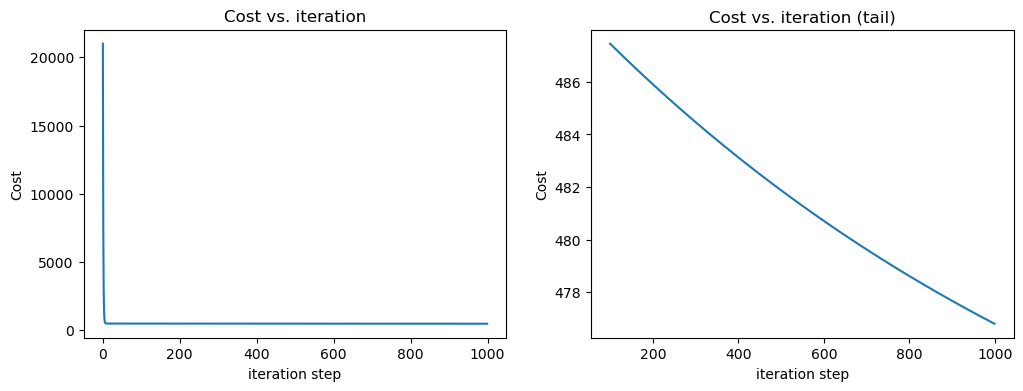

In [61]:
# plot cost vs 迭代次数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration")
ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

上述实验的模型预测的不太准确，损失值还是比较大，后面要讨论如何继续优化它